# Optimal number of FCs

Importing Required Libraries

In [ ]:
pip uninstall pypsa

In [1]:
pip install pypsa

Note: you may need to restart the kernel to use updated packages.


### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import pypsa
import random
import matplotlib.pyplot as plt

D:\Anaconda\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
D:\Anaconda\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


### Importing Required Data

In [3]:
zonexy=pd.read_excel("xy.xlsx",sheet_name="Sheet2")  ##Study Area Data
print(zonexy)

      sr  zone   x   y
0      1     0   0  11
1      2     3   0  10
2      3     7   0   9
3      4     6   0   8
4      5     4   0   7
..   ...   ...  ..  ..
175  176     6  14   4
176  177     8  14   3
177  178     3  14   2
178  179     0  14   1
179  180     4  14   0

[180 rows x 4 columns]


In [4]:
zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")


In [5]:
busxy=pd.read_excel("bus1.xlsx")     ##Bus Data
print(busxy)

      sr  zone   x  y
0      1     7   0  9
1      2     7   0  5
2      3     8   0  3
3      4    11   1  9
4      5    13   1  6
..   ...   ...  .. ..
113  114    12  13  4
114  115    15  13  3
115  116    13  13  2
116  117     7  14  7
117  118     8  14  3

[118 rows x 4 columns]


### Objective Functions

In [6]:
def xyfc(ns):                        ##Funtion to place station Equdistantly
    
    x=118//(ns+1)
    xy=[]
    nos=x
    n=0
    while(n<ns):
    
        xcor=busxy['x'][nos-1]
        ycor=busxy['y'][nos-1]
        xy.append([xcor,ycor])
        nos+=x
        n+=1
    return(xy)

In [7]:
def s(j):                            ##Function for S(j)
    z=1
    sum1=0
    while(z<=180):
        var=0
        if(zdata['st'][z-1]==j):
            var=1
        sum1+=(0.1*zonexy['zone'][z-1]*var)
        z+=1
    return sum1

In [8]:
def sdc(cha):                         ##Function to calculate SDC
    
    val=70000+(25*240*s(cha))+(208.33*(s(cha)-1)*96)
    return val

In [9]:
def evuc(z):                           ##Function to calculate EVUC
    vals=0
    j=zdata["st"][z-1]
    x1=zonexy['x'][z-1]
    x2=lis[j-1][0]
    y1=zonexy['y'][z-1]
    y2=lis[j-1][1]
    dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
    
    vals+=(dist1)*0.142*4*0.98*zonexy['zone'][z-1]*87.7
    
    return vals
    
    

### Process to find the Optimal Number of FCs

In [10]:
sdcarr=[]
xaxis=[]
for ns in range(5,16):
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    xaxis.append(ns)

    for j in range(1,181):

        dist=100000000
        h=0
        lis=xyfc(ns)
        for i in lis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(lis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
       
    sdcval=0
    for x in range(1,ns+1):
        
        value=sdc(x)
        sdcval+=value
    evval=0
    for zon in range(1,181):
       
        evval+=evuc(zon)
        
    sdcval+=evval
    
    sdcarr.append(sdcval)
    
print(sdcarr)
print(xaxis)
#print(zdata)
        
    
    
    
    

[4758107.043948352, 4716736.866156581, 4743671.780449519, 4783093.592155193, 4853034.630667915, 4930601.911632003, 5010335.218234033, 5056115.271347978, 5035300.7746197125, 5060542.890124918, 5101908.575189765]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


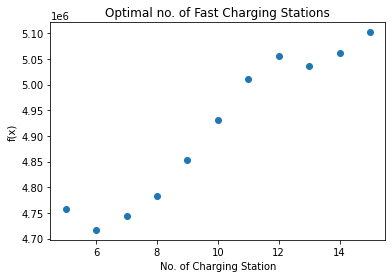

In [11]:
plt.scatter(xaxis,sdcarr)    ##Plotting of Objective Function
plt.title("Optimal no. of Fast Charging Stations")
plt.xlabel("No. of Charging Station")
plt.ylabel("f(x)")
plt.show()

In [12]:
optimal_fcs=xaxis[sdcarr.index(min(sdcarr))]         ##Min number of FCs required.
optimal_fcs


6

In [13]:
zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
xaxis.append(ns)

for j in range(1,181):

    dist=100000000
    h=0
    lis=xyfc(optimal_fcs)
    for i in lis:
        x1=zonexy['x'][j-1]
        x2=i[0]
        y1=zonexy['y'][j-1]
        y2=i[1]

        dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
        if(dist1<dist):
            dist=dist1
            h=(lis.index(i))+1

    df2 = {'st': h, 'zone':j}
    zdata = zdata.append(df2, ignore_index = True)
        
zdata

,zone,st
0,1,3
1,2,3
2,3,2
3,4,2
4,5,2
...,...,...
175,176,6
176,177,6
177,178,6
178,179,6


In [14]:
print(xyfc(6))


[[2, 2], [4, 5], [6, 9], [8, 10], [9, 3], [11, 5]]


In [15]:
xy_buses=[]
x_bus=list(busxy['x'])
y_bus=list(busxy['y'])

for i in range(len(x_bus)):
    x=[x_bus[i],y_bus[i]]
    xy_buses.append(x)
xy_buses

[[0, 9],
 [0, 5],
 [0, 3],
 [1, 9],
 [1, 6],
 [1, 5],
 [1, 4],
 [1, 3],
 [1, 2],
 [2, 9],
 [2, 8],
 [2, 7],
 [2, 6],
 [2, 4],
 [2, 3],
 [2, 2],
 [2, 1],
 [3, 10],
 [3, 9],
 [3, 8],
 [3, 7],
 [3, 6],
 [3, 5],
 [3, 4],
 [3, 3],
 [3, 2],
 [3, 1],
 [4, 9],
 [4, 8],
 [4, 7],
 [4, 6],
 [4, 5],
 [4, 4],
 [4, 3],
 [4, 2],
 [4, 1],
 [5, 11],
 [5, 10],
 [5, 9],
 [5, 8],
 [5, 7],
 [5, 6],
 [5, 5],
 [5, 4],
 [5, 3],
 [5, 2],
 [6, 10],
 [6, 9],
 [6, 8],
 [6, 7],
 [6, 6],
 [6, 5],
 [6, 3],
 [6, 2],
 [7, 10],
 [7, 9],
 [7, 8],
 [7, 7],
 [7, 6],
 [7, 5],
 [7, 4],
 [7, 2],
 [7, 0],
 [8, 10],
 [8, 9],
 [8, 8],
 [8, 6],
 [8, 5],
 [8, 4],
 [8, 3],
 [8, 2],
 [8, 1],
 [9, 10],
 [9, 9],
 [9, 8],
 [9, 7],
 [9, 6],
 [9, 5],
 [9, 4],
 [9, 3],
 [9, 2],
 [10, 11],
 [10, 10],
 [10, 9],
 [10, 8],
 [10, 7],
 [10, 6],
 [10, 5],
 [10, 4],
 [10, 3],
 [10, 2],
 [11, 10],
 [11, 8],
 [11, 7],
 [11, 6],
 [11, 5],
 [11, 4],
 [11, 3],
 [11, 2],
 [12, 11],
 [12, 9],
 [12, 8],
 [12, 7],
 [12, 6],
 [12, 5],
 [12, 4],
 [12, 3],


In [16]:
ran_pop=[]
for i in range(100):
    rand=random.sample(xy_buses, optimal_fcs)
    ran_pop.append(rand)
print(ran_pop[:10])

[[[1, 6], [12, 6], [10, 2], [10, 3], [9, 3], [3, 10]], [[9, 6], [11, 6], [9, 4], [1, 3], [8, 9], [2, 6]], [[9, 5], [3, 8], [5, 6], [8, 3], [8, 4], [5, 4]], [[12, 8], [12, 6], [12, 7], [8, 9], [10, 6], [6, 8]], [[4, 3], [5, 5], [7, 5], [3, 8], [4, 6], [3, 7]], [[5, 10], [8, 1], [4, 9], [7, 8], [13, 3], [9, 9]], [[13, 3], [14, 3], [11, 3], [8, 10], [8, 6], [6, 2]], [[12, 5], [9, 6], [12, 4], [3, 2], [9, 5], [8, 3]], [[13, 10], [11, 2], [5, 10], [1, 6], [12, 7], [3, 4]], [[2, 1], [4, 2], [6, 6], [2, 2], [7, 7], [3, 8]]]


In [17]:
len(ran_pop)

100

### Creating 118 bus Network

In [18]:
network=pypsa.Network()

nbus=118
for i in range(1,nbus+1):
    network.add("Bus","Bus No {}".format(i),v_nom=138)


    
print(network.buses)

attribute   v_nom type    x    y carrier  unit  v_mag_pu_set  v_mag_pu_min  \
Bus No 1    138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 2    138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 3    138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 4    138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 5    138.0       0.0  0.0      AC  None           1.0           0.0   
...           ...  ...  ...  ...     ...   ...           ...           ...   
Bus No 114  138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 115  138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 116  138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 117  138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 118  138.0       0.0  0.0      AC  None           1.0           0.0   

attribute   v_mag_pu_max control sub_network  
Bus No 1        

In [19]:
line_data=pd.read_excel("line_data.xlsx")
line_data

,fbus,tbus,r,x
0,1,2,0.03030,0.09990
1,1,3,0.01290,0.04240
2,4,5,0.00176,0.00798
3,3,5,0.02410,0.10800
4,5,6,0.01190,0.05400
...,...,...,...,...
181,114,115,0.00230,0.01040
182,68,116,0.00034,0.00405
183,12,117,0.03290,0.14000
184,75,118,0.01450,0.04810


In [20]:
for i in range(186):
    network.add("Line","Line No {}".format(i),bus0="Bus No {}".format(line_data['fbus'][i])
    ,bus1="Bus No {}".format(line_data['tbus'][i]),r=line_data['r'][i],x=line_data['x'][i])
    
network.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_extendable,s_nom_min,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line No 0,Bus No 1,Bus No 2,,0.09990,0.03030,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 1,Bus No 1,Bus No 3,,0.04240,0.01290,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 2,Bus No 4,Bus No 5,,0.00798,0.00176,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 3,Bus No 3,Bus No 5,,0.10800,0.02410,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 4,Bus No 5,Bus No 6,,0.05400,0.01190,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Line No 181,Bus No 114,Bus No 115,,0.01040,0.00230,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 182,Bus No 68,Bus No 116,,0.00405,0.00034,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 183,Bus No 12,Bus No 117,,0.14000,0.03290,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 184,Bus No 75,Bus No 118,,0.04810,0.01450,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
network.add("Generator","Slack Gen",bus="Bus No 1",p_set=0,control="Slack")

In [22]:
gen_data=pd.read_excel("generator data.xlsx")
gen_data

,bus no,p_set
0,1,100.0
1,4,100.0
2,6,100.0
3,8,100.0
4,10,550.0
5,12,185.0
6,15,100.0
7,18,100.0
8,19,100.0
9,24,100.0


In [23]:
for i in range(1,54):
    network.add("Generator","Gen No {}".format(i+1),bus="Bus No {}".format(gen_data['bus no'][i]),p_set=gen_data['p_set'][i],control="PV")
    
network.generators

attribute,bus,control,type,p_nom,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Slack Gen,Bus No 1,Slack,,0.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 2,Bus No 4,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 3,Bus No 6,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 4,Bus No 8,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 5,Bus No 10,PV,,0.0,False,0.0,inf,0.0,1.0,550.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 6,Bus No 12,PV,,0.0,False,0.0,inf,0.0,1.0,185.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 7,Bus No 15,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 8,Bus No 18,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 9,Bus No 19,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 10,Bus No 24,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


In [24]:
load_data=pd.read_excel("load data.xlsx")
o=15
for i in range(19):
    network.add("Load","Load No {}".format(o),bus="Bus No {}".format(load_data['Bus'][i]),p_set=load_data['P'][i],q_set=load_data['Q'][i])
    o+=1
network.loads

attribute,bus,carrier,type,p_set,q_set,sign
Load No 15,Bus No 1,,,541.4,86.6,-1.0
Load No 16,Bus No 3,,,414.0,106.2,-1.0
Load No 17,Bus No 2,,,212.3,95.5,-1.0
Load No 18,Bus No 117,,,212.3,84.9,-1.0
Load No 19,Bus No 12,,,498.9,106.2,-1.0
Load No 20,Bus No 11,,,743.1,244.2,-1.0
Load No 21,Bus No 16,,,265.4,106.2,-1.0
Load No 22,Bus No 18,,,636.9,360.9,-1.0
Load No 23,Bus No 20,,,191.1,31.8,-1.0
Load No 24,Bus No 21,,,148.6,84.9,-1.0


In [25]:
def capFCS(j,zdata):
    z=1
    sum1=0
    while(z<=180):
        var=0
        if(zdata['st'][z-1]==j):
            var=1
        sum1+=(0.1*zonexy['zone'][z-1]*var)
        z+=1
    return sum1*96
    
    

In [26]:
def f2(x):
    xylis=[]
    print(x)
    for busno in x:
        xbus=busxy['x'][busno-1]
        ybus=busxy['y'][busno-1]
        xylis.append([xbus,ybus])
    print(xylis)
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    for j in range(1,181):

        dist=100000000
        h=0
        
        for i in xylis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(xylis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
        k=1
       
    for i in x:
        network.add("Load","Load No {}".format(k),bus = "Bus No {}".format(i),p_set=capFCS(k,zdata),q_set=200)
        k+=1
    network.pf()
    df1=network.buses_t.v_mag_pu
    mini=100000000000
    for i in range(118):
        if(df1.iloc[0][i]<mini):
            mini=df1.iloc[0][i]
    vdev=1-mini
    for i in range(1,7):
        network.remove("Load","Load No {}".format(i))
    return vdev

In [27]:
maxvdev=f2([4,24,65,79,90,102])
print(maxvdev)

[4, 24, 65, 79, 90, 102]
[[1, 9], [3, 4], [8, 9], [9, 4], [10, 3], [12, 8]]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.192971 seconds


0.001712197552355521


In [28]:
network.remove("Load","Load No 15")

In [36]:
def evucnew(z,xylis):                           ##Function to calculate EVUC
    vals=0
    j=zdata["st"][z-1]
    x1=zonexy['x'][z-1]
    x2=xylis[j-1][0]
    y1=zonexy['y'][z-1]
    y2=xylis[j-1][1]
    dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
    
    vals+=(dist1)*0.142*4*0.98*zonexy['zone'][z-1]*87.7
    
    return vals

### NSGA II Algorithm

In [37]:
class Individual(object):

    def __init__(self):
        self.rank = None
        self.crowding_distance = None
        self.domination_count = None
        self.dominated_solutions = None
        self.features = None
        self.objectives = None

    def __eq__(self, other):
        if isinstance(self, other.__class__):
            return self.features == other.features
        return False

    def dominates(self, other_individual):
        and_condition = True
        or_condition = False
        for first, second in zip(self.objectives, other_individual.objectives):
            and_condition = and_condition and first <= second
            or_condition = or_condition or first < second
        return (and_condition and or_condition)


class Population:

    def __init__(self):
        self.population = []
        self.fronts = []

    def __len__(self):
        return len(self.population)

    def __iter__(self):
        return self.population.__iter__()

    def extend(self, new_individuals):
        self.population.extend(new_individuals)

    def append(self, new_individual):
        self.population.append(new_individual)

        

import random

class Problem:

    def __init__(self, objectives, num_of_variables, variables_range, expand=True, same_range=False):
        self.num_of_objectives = len(objectives)
        self.num_of_variables = num_of_variables
        self.objectives = objectives
        self.expand = expand
        self.variables_range = []
        if same_range:
            for _ in range(num_of_variables):
                self.variables_range.append(variables_range[0])
        else:
            self.variables_range = variables_range

    def generate_individual(self):
        individual = Individual()
        
        varran=[x for x in range(self.variables_range[0][0],self.variables_range[0][1]+1)]
        
        individual.features = random.sample(varran,6)
        print(individual.features)
        return individual

    def calculate_objectives(self, individual):
        if self.expand:
            ##print(individual.features)
            individual.objectives = [f(*individual.features) for f in self.objectives]
        else:
            ##print(individual.features)
            
            individual.objectives = [f(individual.features) for f in self.objectives]
            
            

class NSGA2Utils:

    def __init__(self, problem, num_of_individuals=100,
                 num_of_tour_particips=2, tournament_prob=0.9, crossover_param=2, mutation_param=5):

        self.problem = problem
        self.num_of_individuals = num_of_individuals
        self.num_of_tour_particips = num_of_tour_particips
        self.tournament_prob = tournament_prob
        self.crossover_param = crossover_param
        self.mutation_param = mutation_param

    def create_initial_population(self):
        population = Population()
        
        for i in range(self.num_of_individuals):
            individual = self.problem.generate_individual()
            self.problem.calculate_objectives(individual)
            population.append(individual)
            #print(population.population[i].features)
        
        return population

    def fast_nondominated_sort(self, population):
        population.fronts = [[]]
        for individual in population:
            individual.domination_count = 0
            individual.dominated_solutions = []
            for other_individual in population:
                if individual.dominates(other_individual):
                    individual.dominated_solutions.append(other_individual)
                elif other_individual.dominates(individual):
                    individual.domination_count += 1
            if individual.domination_count == 0:
                individual.rank = 0
                population.fronts[0].append(individual)
        i = 0
        while len(population.fronts[i]) > 0:
            temp = []
            for individual in population.fronts[i]:
                for other_individual in individual.dominated_solutions:
                    other_individual.domination_count -= 1
                    if other_individual.domination_count == 0:
                        other_individual.rank = i+1
                        temp.append(other_individual)
            i = i+1
            population.fronts.append(temp)

    def calculate_crowding_distance(self, front):
        if len(front) > 0:
            solutions_num = len(front)
            for individual in front:
                individual.crowding_distance = 0

            for m in range(len(front[0].objectives)):
                front.sort(key=lambda individual: individual.objectives[m])
                front[0].crowding_distance = 10**9
                front[solutions_num-1].crowding_distance = 10**9
                m_values = [individual.objectives[m] for individual in front]
                scale = max(m_values) - min(m_values)
                if scale == 0: scale = 1
                for i in range(1, solutions_num-1):
                    front[i].crowding_distance += (front[i+1].objectives[m] - front[i-1].objectives[m])/scale

    def crowding_operator(self, individual, other_individual):
        if (individual.rank < other_individual.rank) or \
            ((individual.rank == other_individual.rank) and (individual.crowding_distance > other_individual.crowding_distance)):
            return 1
        else:
            return -1

    def create_children(self, population):
        children = []
        while len(children) < len(population):
            parent1 = self.__tournament(population)
            parent2 = parent1
            while parent1 == parent2:
                parent2 = self.__tournament(population)
            child1, child2 = self.__crossover(parent1, parent2)
            self.__mutate(child1)
            self.__mutate(child2)
            self.problem.calculate_objectives(child1)
            self.problem.calculate_objectives(child2)
            children.append(child1)
            children.append(child2)

        return children

    def __crossover(self, individual1, individual2):
        child1 = self.problem.generate_individual()
        child2 = self.problem.generate_individual()
        num_of_features = len(child1.features)
        genes_indexes = range(num_of_features)
        for i in genes_indexes:
            beta = self.__get_beta()
            x1 = ((individual1.features[i] + individual2.features[i])/2)
            x2 = abs((individual1.features[i] - individual2.features[i])/2)
            child1.features[i] = round(x1 + beta*x2)
            child2.features[i] = round(x1 - beta*x2)
        return child1, child2

    def __get_beta(self):
        u = random.random()
        if u <= 0.5:
            return (2*u)**(1/(self.crossover_param+1))
        return (2*(1-u))**(-1/(self.crossover_param+1))

    def __mutate(self, child):
        num_of_features = len(child.features)
        for gene in range(num_of_features):
            u, delta = self.__get_delta()
            if u < 0.5:
                child.features[gene] += round(delta*(child.features[gene] - self.problem.variables_range[gene][0]))
            else:
                child.features[gene] += round(delta*(self.problem.variables_range[gene][1] - child.features[gene]))
            if child.features[gene] < self.problem.variables_range[gene][0]:
                child.features[gene] = round(self.problem.variables_range[gene][0])
            elif child.features[gene] > self.problem.variables_range[gene][1]:
                child.features[gene] = round(self.problem.variables_range[gene][1])

    def __get_delta(self):
        u = random.random()
        if u < 0.5:
            return u, ((2*u)**(1/(self.mutation_param + 1))) - 1
        return u, (1 - (2*(1-u))**(1/(self.mutation_param + 1)))

    def __tournament(self, population):
       
        participants = random.sample(population.population, self.num_of_tour_particips)
        
        best = None
        for participant in participants:
            if best is None or (self.crowding_operator(participant, best) == 1 and self.__choose_with_prob(self.tournament_prob)):
                best = participant

        return best

    def __choose_with_prob(self, prob):
        if random.random() <= prob:
            return True
        return False

    

class Evolution:

    def __init__(self, problem, num_of_generations=4, num_of_individuals=3, num_of_tour_particips=2, tournament_prob=0.7, crossover_param=3, mutation_param=5):
        self.utils = NSGA2Utils(problem, num_of_individuals, num_of_tour_particips, tournament_prob, crossover_param, mutation_param)
        self.population = None
        self.num_of_generations = num_of_generations
        self.on_generation_finished = []
        self.num_of_individuals = num_of_individuals

    def evolve(self):
        self.population = self.utils.create_initial_population()
        self.utils.fast_nondominated_sort(self.population)
        for front in self.population.fronts:
            self.utils.calculate_crowding_distance(front)
        children = self.utils.create_children(self.population)
        returned_population = None
        for i in range(self.num_of_generations):
            self.population.extend(children)
            self.utils.fast_nondominated_sort(self.population)
            new_population = Population()
            front_num = 0
            while len(new_population) + len(self.population.fronts[front_num]) <= self.num_of_individuals:
                self.utils.calculate_crowding_distance(self.population.fronts[front_num])
                new_population.extend(self.population.fronts[front_num])
                front_num += 1
            self.utils.calculate_crowding_distance(self.population.fronts[front_num])
            self.population.fronts[front_num].sort(key=lambda individual: individual.crowding_distance, reverse=True)
            new_population.extend(self.population.fronts[front_num][0:self.num_of_individuals-len(new_population)])
            returned_population = self.population
            self.population = new_population
            self.utils.fast_nondominated_sort(self.population)
            for front in self.population.fronts:
                self.utils.calculate_crowding_distance(front)
            children = self.utils.create_children(self.population)
        return returned_population.fronts[0]


### EVUC vs Voltage Dev

[31, 24, 89, 98, 62, 43]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049973 seconds


[95, 48, 52, 83, 67, 50]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059971 seconds


[53, 101, 1, 24, 58, 109]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059971 seconds


[110, 12, 87, 114, 69, 113]
[33, 35, 63, 102, 67, 92]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.071953 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds


[88, 44, 45, 12, 94, 76]
[12, 1, 34, 97, 108, 95]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049977 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079958 seconds


[99, 3, 9, 23, 17, 1]
[15, 55, 31, 29, 62, 32]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059966 seconds


[45, 50, 42, 71, 96, 26]
[31, 90, 96, 75, 100, 2]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049975 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059971 seconds


[91, 38, 99, 77, 17, 104]
[34, 85, 69, 62, 53, 22]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069962 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059969 seconds


[99, 15, 59, 10, 105, 89]
[12, 45, 46, 113, 97, 11]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069965 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079953 seconds


[65, 84, 37, 103, 93, 58]
[103, 65, 43, 91, 28, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059969 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069962 seconds


[105, 80, 33, 75, 102, 54]
[45, 19, 71, 76, 32, 31]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.089951 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069966 seconds


[15, 38, 44, 13, 89, 80]
[100, 67, 72, 107, 30, 44]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.070002 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069963 seconds


[64, 35, 60, 12, 58, 26]
[71, 13, 76, 57, 19, 5]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059971 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.068363 seconds


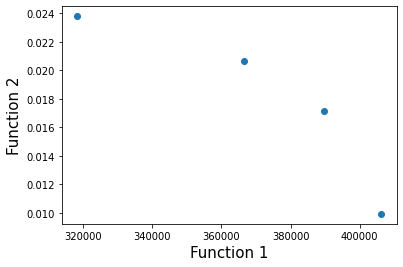

In [38]:

import matplotlib.pyplot as plt
import math

def f1(x):
    s = 0
    
    xylis=[]
    for busno in x:
        xbus=busxy['x'][busno-1]
        ybus=busxy['y'][busno-1]
        xylis.append([xbus,ybus])
    
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    for j in range(1,181):

        dist=100000000
        h=0
        
        for i in xylis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(xylis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
     
    for zon in range(1,181):
       
        s+=evucnew(zon,xylis)
    
    return s

def f2(x):
    xylis=[]
    
    for busno in x:
        xbus=busxy['x'][busno-1]
        ybus=busxy['y'][busno-1]
        xylis.append([xbus,ybus])
    
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    for j in range(1,181):

        dist=100000000
        h=0
        
        for i in xylis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(xylis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
        k=1
       
    for i in x:
        network.add("Load","Load No {}".format(k),bus = "Bus No {}".format(i),p_set=capFCS(k,zdata),q_set=200)
        k+=1
    network.pf()
    df1=network.buses_t.v_mag_pu
    mini=100000000000
    for i in range(118):
        if(df1.iloc[0][i]<mini):
            mini=df1.iloc[0][i]
    vdev=(1-mini)*10
    for i in range(1,7):
        network.remove("Load","Load No {}".format(i))
    return vdev

problem = Problem(num_of_variables=6, objectives=[f1, f2], variables_range=[(1, 118)], same_range=True, expand=False)
evo = Evolution(problem, mutation_param=20)
func = [i.objectives for i in evo.evolve()]

function1 = [i[0] for i in func]
function2 = [i[1] for i in func]
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(function1, function2)
plt.show()

In [39]:
def f3(x):
    xylis=[]
    
    for busno in x:
        xbus=busxy['x'][busno-1]
        ybus=busxy['y'][busno-1]
        xylis.append([xbus,ybus])
    
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    for j in range(1,181):

        dist=100000000
        h=0
        
        for i in xylis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(xylis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
        k=1
       
    for i in x:
        network.add("Load","Load No {}".format(k),bus = "Bus No {}".format(i),p_set=capFCS(k,zdata),q_set=200)
        k+=1
    network.pf()
    df3 = network.lines_t
    nploss=0
    for i in range(186):
        nploss+=(df3.p0.iloc[0][i]+df3.p1.iloc[0][i])
        
        
    return abs(nploss)
        

### EVUC vs NPL

[83, 79, 11, 52, 51, 27]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069966 seconds


[40, 3, 22, 49, 87, 1]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079957 seconds


[32, 40, 102, 62, 111, 3]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059969 seconds


[88, 68, 69, 39, 96, 14]
[65, 81, 36, 14, 23, 59]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069963 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds


[66, 99, 109, 48, 59, 28]
[70, 8, 71, 90, 86, 55]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.089948 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059971 seconds


[16, 11, 51, 97, 40, 113]
[96, 22, 3, 36, 78, 107]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069962 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069965 seconds


[81, 14, 95, 39, 15, 52]
[18, 46, 98, 39, 69, 88]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049972 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069962 seconds


[96, 101, 35, 78, 10, 27]
[115, 23, 92, 101, 51, 19]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059965 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059969 seconds


[47, 56, 95, 92, 18, 61]
[111, 47, 23, 73, 10, 96]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049937 seconds


[105, 24, 97, 28, 73, 74]
[15, 2, 19, 95, 102, 67]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059970 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds


[49, 61, 59, 56, 105, 43]
[41, 11, 60, 7, 52, 51]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069959 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069960 seconds


[94, 77, 87, 80, 73, 96]
[114, 6, 49, 56, 96, 29]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059969 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059934 seconds


[113, 55, 28, 112, 63, 38]
[105, 99, 10, 90, 83, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069961 seconds


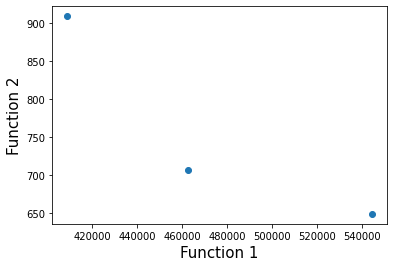

In [40]:

import matplotlib.pyplot as plt
import math

def f1(x):
    s = 0
    
    xylis=[]
    for busno in x:
        xbus=busxy['x'][busno-1]
        ybus=busxy['y'][busno-1]
        xylis.append([xbus,ybus])
    
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    for j in range(1,181):

        dist=100000000
        h=0
        
        for i in xylis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(xylis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
     
    for zon in range(1,181):
       
        s+=evucnew(zon,xylis)
    
    return s

def f2(x):
    xylis=[]
    
    for busno in x:
        xbus=busxy['x'][busno-1]
        ybus=busxy['y'][busno-1]
        xylis.append([xbus,ybus])
    
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    for j in range(1,181):

        dist=100000000
        h=0
        
        for i in xylis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(xylis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
        k=1
       
    for i in x:
        network.add("Load","Load No {}".format(k),bus = "Bus No {}".format(i),p_set=capFCS(k,zdata),q_set=200)
        k+=1
    network.pf()
    df3 = network.lines_t
    nploss=0
    for i in range(186):
        nploss+=(df3.p0.iloc[0][i]+df3.p1.iloc[0][i])
        
    for i in range(1,7):
        network.remove("Load","Load No {}".format(i))  
    return abs(nploss)

problem = Problem(num_of_variables=6, objectives=[f1, f2], variables_range=[(1, 118)], same_range=True, expand=False)
evo = Evolution(problem, mutation_param=20)
func = [i.objectives for i in evo.evolve()]

function1 = [i[0] for i in func]
function2 = [i[1] for i in func]
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(function1, function2)
plt.show()

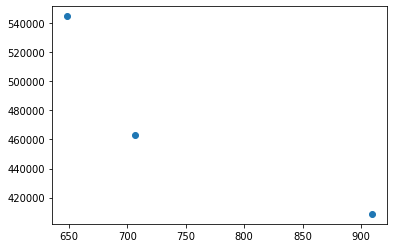

In [41]:
plt.scatter(function2,function1)
plt.show()

### EVUC vs NPL vs MVD

[36, 60, 81, 17, 85, 66]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.089952 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069959 seconds


[23, 90, 19, 64, 22, 86]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.081939 seconds


[85, 47, 98, 105, 11, 10]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.068031 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069961 seconds


[100, 60, 71, 88, 40, 46]
[52, 61, 67, 53, 60, 80]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.089948 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069962 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079954 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059972 seconds


[37, 13, 104, 112, 97, 111]
[10, 61, 115, 47, 81, 102]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059970 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049970 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069964 seconds


[79, 11, 52, 87, 82, 50]
[36, 96, 41, 54, 29, 82]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049977 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059967 seconds


[15, 12, 30, 77, 82, 20]
[29, 2, 21, 73, 9, 84]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059967 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055547 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059967 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069966 seconds


[37, 85, 22, 5, 56, 4]
[49, 116, 84, 31, 51, 35]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059971 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059971 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds


[53, 59, 112, 19, 118, 113]
[98, 28, 74, 73, 1, 101]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049969 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059966 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059965 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.079958 seconds


[36, 43, 89, 114, 55, 58]
[35, 20, 88, 111, 110, 69]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.089951 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059970 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069960 seconds


[54, 94, 38, 42, 45, 79]
[50, 62, 45, 13, 115, 22]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059970 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.068031 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059965 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059974 seconds


[31, 90, 24, 112, 41, 85]
[116, 12, 36, 111, 48, 113]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059969 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059965 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049974 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds


[105, 19, 71, 63, 34, 82]
[14, 25, 92, 94, 33, 107]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069965 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.069960 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059965 seconds
INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059968 seconds


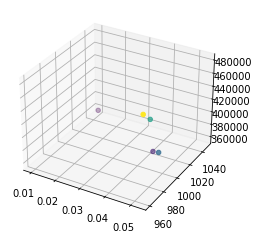

In [42]:

import matplotlib.pyplot as plt
import math

def f1(x):
    xylis=[]
    
    for busno in x:
        xbus=busxy['x'][busno-1]
        ybus=busxy['y'][busno-1]
        xylis.append([xbus,ybus])
    
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    for j in range(1,181):

        dist=100000000
        h=0
        
        for i in xylis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(xylis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
        k=1
       
    for i in x:
        network.add("Load","Load No {}".format(k),bus = "Bus No {}".format(i),p_set=capFCS(k,zdata),q_set=200)
        k+=1
    network.pf()
    df1=network.buses_t.v_mag_pu
    mini=100000000000
    for i in range(118):
        if(df1.iloc[0][i]<mini):
            mini=df1.iloc[0][i]
    vdev=(1-mini)*10
    for i in range(1,7):
        network.remove("Load","Load No {}".format(i))
    return vdev
def f2(x):
    xylis=[]
    
    for busno in x:
        xbus=busxy['x'][busno-1]
        ybus=busxy['y'][busno-1]
        xylis.append([xbus,ybus])
    
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    for j in range(1,181):

        dist=100000000
        h=0
        
        for i in xylis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(xylis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
        k=1
       
    for i in x:
        network.add("Load","Load No {}".format(k),bus = "Bus No {}".format(i),p_set=capFCS(k,zdata),q_set=200)
        k+=1
    network.pf()
    df3 = network.lines_t
    nploss=0
    for i in range(186):
        nploss+=(df3.p0.iloc[0][i]+df3.p1.iloc[0][i])
        
    for i in range(1,7):
        network.remove("Load","Load No {}".format(i))  
    return abs(nploss)

def f3(x):
    s = 0
    
    xylis=[]
    for busno in x:
        xbus=busxy['x'][busno-1]
        ybus=busxy['y'][busno-1]
        xylis.append([xbus,ybus])
    
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    for j in range(1,181):

        dist=100000000
        h=0
        
        for i in xylis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(xylis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
     
    for zon in range(1,181):
       
        s+=evucnew(zon,xylis)
    
    return s
    

problem = Problem(num_of_variables=6, objectives=[f1, f2,f3], variables_range=[(1, 118)], same_range=True, expand=False)
evo = Evolution(problem, mutation_param=20)
func = [i.objectives for i in evo.evolve()]

ax = plt.axes(projection='3d')
function1 = [i[0] for i in func]
function2 = [i[1] for i in func]
function3 = [i[2] for i in func]
ax.scatter3D(function1, function2, function3, c=function3);


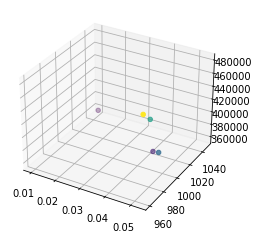

In [43]:
ax = plt.axes(projection='3d')
function1 = [i[0] for i in func]
function2 = [i[1] for i in func]
function3 = [i[2] for i in func]
ax.scatter3D(function1, function2, function3, c=function3)


In [44]:
print(func)

[[0.009928850010646473, 1047.2762185506613, 357895.7402840946], [0.05267017803517904, 960.7130067546642, 480593.5221019983], [0.04434893111823657, 1006.7789048361994, 370056.666134531], [0.05221504693016854, 985.1730649268046, 399955.5227819014], [0.0448022970591766, 1000.2385483865978, 426874.163909992]]


### MINIMAX ALGORITHM

In [46]:
import math
 
def minimax (curDepth, nodeIndex,
             maxTurn, scores,
             targetDepth):
 
    # base case : targetDepth reached
    if (curDepth == targetDepth):
        return scores[nodeIndex]
     
    if (maxTurn):
        return max(minimax(curDepth + 1, nodeIndex * 2,
                    False, scores, targetDepth),
                   minimax(curDepth + 1, nodeIndex * 2 + 1,
                    False, scores, targetDepth))
     
    else:
        return min(minimax(curDepth + 1, nodeIndex * 2,
                     True, scores, targetDepth),
                   minimax(curDepth + 1, nodeIndex * 2 + 1,
                     True, scores, targetDepth))
     
# Driver code
scores = func
treeDepth = math.floor(math.log(len(scores), 2))
 
print("The optimal value is : ", end = "")
print(minimax(0, 0, True, scores, treeDepth))

The optimal value is : [0.04434893111823657, 1006.7789048361994, 370056.666134531]


In [47]:
import session_info
session_info.show()